# Coffee Profiles
This notebook describes the data analysis process for an experimental design project focused on different aspects of coffee profiles. The data used in this project were scraped from the website of a [green coffee company](https://www.sweetmarias.com/). The webscraper and cleaning scripts, as well as the raw data, can be found in [my GitHub profile](https://github.com/aquaal/coffeeprofiles).

## Coffee Profile Features
Each coffee variety in the dataset below contains the following information:
* **Name**: Name of the coffee variety
* **Origin**: Region in which coffee is grown
* **Processing**: Method by which coffee beans are removed from coffee cherries
* **Flavor Notes**: Prevalence of each of twelve standard flavor notes, each on an integer scale of 0-5
* **Cupping Scores**: Rating of each of ten cupping sub-scores, each on a float scale of 6-10
* **Total Score**: Overall cupping score on a float scale of 60-100

## Cupping Scores & Coffee Prices
The prices of coffee are largely determined by the commodity futures market -- or "C market" -- and the Intercontinental Exchange (ICE). Recently, the Speciality Coffee Association (SCA) has declared a price crisis in the speciality coffee industry, as the C market price has hovered at levels that make quality coffee production unsustainable for farmers in the Global South. Coffee prices based on the C market dropped below \$1/lb for the first time in 2018 -- and while there are some premiums added to this price based on the quality, certifications, and origin of coffee beans, many farmers continue to operate at a loss. At the same time, speciality roasters have enjoyed profit margins sometimes exceeding 15\% over the past decade. More information about the coffee price crisis can be found at the [SCA's website](https://www.sweetmarias.com/).

Given this current trend in the coffee industry, alternative pricing models are appearing that more closely tie coffee to its quality as determined by professional coffee cuppers. These individuals are certified in the science and sensory skills of coffee tasting, and prices based on quality score (sometimes called the Q-score, developed by the [Coffee Quality Institute](https://www.coffeeinstitute.org/)) can be [dramatically higher](http://www.transparenttradecoffee.org/insights) than their C market analogues. 

As the price of coffee becomes more standardized on quality cupping scores, it is prudent for those in the industry to gain more insight into the factors that affect cupping scores. This project is a preliminary attempt to understand some of those factors.

## Research Questions
There are several questions that I am attempting to answer with this dataset:
1. How do cupping scores vary by region?
2. How do cupping scores vary by processing method?
3. How does the presence of certain flavor notes affect cupping scores?

The rest of this notebook attempts to answer these questions one-by-one.

### Data Preparation
The cells below import and prepare the data for analysis.

In [1]:
# Import necessary libraries
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

# Load in data from GitHub repo
path = 'https://raw.githubusercontent.com/aquaal/coffeeprofiles/main/coffee_data.csv'
coffee_data = pd.read_csv(path)
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            357 non-null    object 
 1   Origin          354 non-null    object 
 2   Processing      357 non-null    object 
 3   Floral          357 non-null    float64
 4   Honey           357 non-null    float64
 5   Sugars          357 non-null    float64
 6   Caramel         357 non-null    float64
 7   Fruits          357 non-null    float64
 8   Citrus          357 non-null    float64
 9   Berry           357 non-null    float64
 10  Cocoa           357 non-null    float64
 11  Nuts            357 non-null    float64
 12  Rustic          357 non-null    float64
 13  Spice           357 non-null    float64
 14  Body (Flavor)   357 non-null    float64
 15  Dry Fragrance   357 non-null    float64
 16  Wet Aroma       357 non-null    float64
 17  Brightness      357 non-null    flo

### Q1: How do cupping scores vary by region?
While the coffees in this dataset come from 19 different countries, I grouped them into three major regions of production:
* **East Africa**: Ethiopia, Kenya, Rwanda, Burundi, \& Tanzania
* **South America**: Costa Rica, El Salvador, Guatemala, Nicaragua, Honduras, Panama, Mexico, Brazil, Colombia, \& Peru
* **Southeast Asia**: Indonesia, Timor, \& Papua New Guinea

First, the data must be checked for normalcy.

In [2]:
# Split up dataset by origin
coffee_africa = coffee_data[(coffee_data['Origin'] == 'East Africa')]
coffee_samerica = coffee_data[(coffee_data['Origin'] == 'South America')]
coffee_seasia = coffee_data[(coffee_data['Origin'] == 'Southeast Asia')]

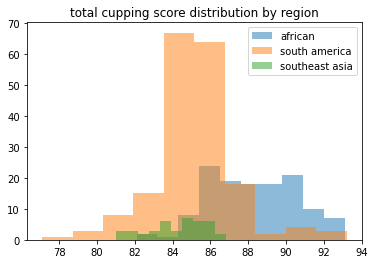

In [3]:
# Plot histographs of each subset of data
plt.hist(coffee_africa['Total Score'], alpha = .5, label = "african")
plt.hist(coffee_samerica['Total Score'], alpha = .5, label = "south america")
plt.hist(coffee_seasia['Total Score'], alpha = .5, label = "southeast asia")
plt.legend(loc='upper right')
plt.title('total cupping score distribution by region')
plt.show()

In [4]:
# Print out skewness and kurtosis values for each subset of data, along with the median
print('East African:', '\n', stats.describe(coffee_africa['Total Score']), '\n')
print('South American:', '\n', stats.describe(coffee_samerica['Total Score']), '\n')
print('Southeast Asian:', '\n', stats.describe(coffee_seasia['Total Score']), '\n')

East African: 
 DescribeResult(nobs=128, minmax=(82.10000000000002, 93.1), mean=88.2609375, variance=5.0682258858267675, skewness=-0.10436861880328711, kurtosis=-0.45426735622902825) 

South American: 
 DescribeResult(nobs=185, minmax=(77.1, 93.2), mean=85.15945945945947, variance=4.522858401880142, skewness=0.3009226210762872, kurtosis=3.163628577034884) 

Southeast Asian: 
 DescribeResult(nobs=41, minmax=(81.0, 86.8), mean=84.1780487804878, variance=2.3472560975609706, skewness=-0.39019430465067, kurtosis=-0.6722850078063054) 



#### Statistical Test for Q1
The cupping score distribution for South America is too leptokurtic to assume normality, so a Kruskal-Wallis H-test will have to be used on these data. This is a non-parametric version of ANOVA, which tests the null hypothesis that the population median of groups are equal.

In [5]:
# Perform Kruskal-Wallis H-test on each pair of subsets
print('East African vs. South American:', stats.kruskal(coffee_africa['Total Score'], coffee_samerica['Total Score']))
print('East African vs. Southeast Asian:', stats.kruskal(coffee_africa['Total Score'], coffee_seasia['Total Score']))
print('South American vs. Southeast Asian:', stats.kruskal(coffee_samerica['Total Score'], coffee_seasia['Total Score']))

East African vs. South American: KruskalResult(statistic=117.16909693677592, pvalue=2.6360690277295793e-27)
East African vs. Southeast Asian: KruskalResult(statistic=71.69118273817458, pvalue=2.516545609954639e-17)
South American vs. Southeast Asian: KruskalResult(statistic=9.292390177566123, pvalue=0.0023010772803395323)


#### Results for Q1
These results show there is a significant difference between the median cupping scores of each region. The descriptive stats displayed above do not show the median for each set, but we can find them here.

In [6]:
# Print median values of each subset
print('East African:', np.median(coffee_africa['Total Score']))
print('South American:', np.median(coffee_samerica['Total Score']))
print('Southeast Asian:', np.median(coffee_seasia['Total Score']))

East African: 88.15
South American: 85.1
Southeast Asian: 84.5


Based on the median of each region's distribution, it appers **East Africa yielded the highest cupping scores, following by South America and then Southeast Asia**.

### Q2: How do cupping scores vary by processing method?
There are many processing methods for coffee, but *most* can be grouped into three categories
* **Wet Process**: These methods remove beans from the coffee cherries before they are dried; there are a variety of wet process methods, but they all involve substantial overhead equipment and water. These methods can have a negative impact on the local ecology, as they generate wastewater. However, they reflect a growing understanding of coffee science and provide a method by which farmers can add value to their product locally.
    * Dry methods in this dataset include "Wet Process", "Wet Process Kenya Type", and "Machine Washed"

* **Dry Process**: This method allows coffee cherries to dry on tables or patios first, before the removal of coffee beans. It is the oldest method of coffee processing and the least technologically-intensive. However, it is not a practical method in regions with high humidity or rainfall.

* **Semi-Dry Process**: These processes are rather varied, but they all reflect an intermediate method between wet and dry processing. These processes involve the removal of the outer skin of coffee cherries prior to a waiting period of up to a day before a washing and drying procedure. Bacteria can be an issue, as pulped coffee cherries can ferment in their mucilage.
    * Semi-dry methods in this dataset include "Honey Process", "Pulp Natural", "Wet Hulled", and "Giling Basah"

* **Decaffeination Methods**: There are some coffees in this dataset which underwent decaffeination methods. However, there are only 5 such instances of this, so they were not included in this analysis.

First, the data must be checked for normalcy.

In [7]:
# Split up dataset by processing method
coffee_wet = coffee_data[(coffee_data['Processing'] == 'Wet Process') 
                        | (coffee_data['Processing'] == 'Wet Process Kenya Type')
                        | (coffee_data['Processing'] == 'Machine Washed')]

coffee_dry = coffee_data[(coffee_data['Processing'] == 'Dry Process')]

coffee_semidry = coffee_data[(coffee_data['Processing'] == 'Honey Process') 
                        | (coffee_data['Processing'] == 'Pulp Natural')
                        | (coffee_data['Processing'] == 'Wet Hulled') 
                        | (coffee_data['Processing'] == 'Giling Basah')]

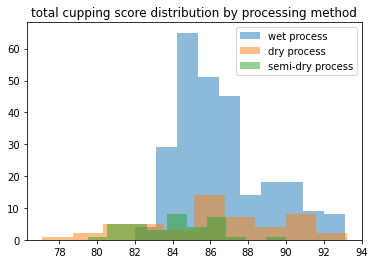

In [8]:
# Plot histographs of each subset of data
plt.hist(coffee_wet['Total Score'], alpha = .5, label = "wet process")
plt.hist(coffee_dry['Total Score'], alpha = .5, label = "dry process")
plt.hist(coffee_semidry['Total Score'], alpha = .5, label = "semi-dry process")
plt.legend(loc='upper right')
plt.title('total cupping score distribution by processing method')
plt.show()

In [9]:
# Print out skewness and kurtosis values for each subset of data, along with the median
print('Wet Process:', '\n', stats.describe(coffee_wet['Total Score']), '\n')
print('Dry Process:', '\n', stats.describe(coffee_dry['Total Score']), '\n')
print('Semi-dry Process:', '\n', stats.describe(coffee_semidry['Total Score']), '\n')

Wet Process: 
 DescribeResult(nobs=261, minmax=(82.0, 93.1), mean=86.54636015325671, variance=5.409419392867666, skewness=0.7802577935171323, kurtosis=-0.1599365330063791) 

Dry Process: 
 DescribeResult(nobs=51, minmax=(77.1, 93.2), mean=86.11372549019609, variance=13.363607843137258, skewness=-0.22016163076654657, kurtosis=-0.4987210038694565) 

Semi-dry Process: 
 DescribeResult(nobs=35, minmax=(79.5, 90.0), mean=83.99714285714286, variance=4.936168067226882, skewness=0.23502359490048175, kurtosis=-0.03346196047950922) 



#### Statistical Test for Q2
These three distributions appear to be normally distributed, so we can use ANOVA to compare their population means. Our null hypothesis is that there is no difference between the means of these three populations.

In [10]:
# Perform ANOVA on subsets
print(stats.f_oneway(coffee_wet['Total Score'], coffee_dry['Total Score'], coffee_semidry['Total Score']))

F_onewayResult(statistic=15.440211640409853, pvalue=3.7887602460151663e-07)


From these results, it is clear that there is a significant difference between the means of the three methods. However, the descriptive statistics show a remarkably close mean for the wet and dry processes. We can conduct three individual t-tests to see the difference between each pair of subsets.

In [11]:
# Perform pairwise t-tests
print('Wet vs. Dry Process:', stats.ttest_ind(coffee_wet['Total Score'], coffee_dry['Total Score']))
print('Wet vs. Semi-dry Process:', stats.ttest_ind(coffee_wet['Total Score'], coffee_semidry['Total Score']))
print('Dry vs. Semi-dry Process:', stats.ttest_ind(coffee_dry['Total Score'], coffee_semidry['Total Score']))

Wet vs. Dry Process: Ttest_indResult(statistic=1.0923452802438756, pvalue=0.27552954395476437)
Wet vs. Semi-dry Process: Ttest_indResult(statistic=6.119953529586891, pvalue=2.984613628754644e-09)
Dry vs. Semi-dry Process: Ttest_indResult(statistic=3.05660269833692, pvalue=0.0030012455376790827)


Since these distributions were normal, we can also calculate a confidence interval for each pairwise t-test. Since there is no built-in function for calculating confidence intervals, we can define one here (for 95% CI).

In [12]:
# Define function to calculate 95% confidence intervals for two arrays of values
def ci_95(array1, array2):
    s1_n = array1.shape[0]
    s2_n = array2.shape[0]
    s1_mean = array1.mean()
    s2_mean = array2.mean()
    s1_var = array1.var()
    s2_var = array2.var()
    mean_diff = s1_mean - s2_mean
    se_diff = math.sqrt((s1_var/s1_n)+(s2_var/s2_n))
    margin_error = 1.96 * se_diff
    ci_lower = mean_diff - margin_error
    ci_upper = mean_diff + margin_error
    cis = [ci_lower, ci_upper]
    return cis

In [13]:
# Calculate confidence intervals for three pairwise t-tests
print('Wet vs. Semi-dry Process:', ci_95(coffee_wet['Total Score'], coffee_semidry['Total Score']))
print('Dry vs. Semi-dry Process:', ci_95(coffee_dry['Total Score'], coffee_semidry['Total Score']))

Wet vs. Semi-dry Process: [1.76091923809043, 3.3375153541372744]
Dry vs. Semi-dry Process: [0.872229741534388, 3.360935524572066]


#### Results for Q2
As we can see from these pairwise t-tests, there is a sigificant difference between both wet and dry processes when they are compared to semi-dry processes. Within a confidence interval of 95%, wet process coffees seem to score between 1.76 to 3.34 cupping points higher than semidry process coffees. Dry process coffees score on average 0.87 to 3.36 points higher.

However, there is not a sigifnicant difference between the means of wet and dry processes.

### Q3: How does the presence of certain flavor notes affect cupping scores?
One of the most important end-results of processing methods is the heightening of flavor notes within a coffee. The coffee varities of different countries -- and even entire regions -- are often characterized by a few common flavor notes. East African coffees (my favorites) often carry floral and citrus notes. South American coffees are known for their deep chocolate and fruity notes, and Southeastern Asian coffees tend to have spicy, earthy notes.

There are 12 different flavor notes whose prevalence are recorded in this dataset, each on a scale of 0-5:
* Floral
* Honey
* Sugars
* Caramel
* Fruits
* Citrus
* Berry
* Cocoa
* Nuts
* Rustic
* Spice
* Body

While flavor notes are often one of individual preference, it may be insightful to see how the prevalence of each note affects the overall cupping score (or not). 

**This section is interactive**, requesting both a flavor and a flavor threshold (1-5) from the user. The script then subsets data based on the coffees which meet both the flabor and threshold criteria against all coffees which do not meet that criteria. *In order to receive any insightful results, a threshold of 3-4 is recommended.*

In [14]:
# Initialize flavor dictionary
flavors = {1: 'Floral', 2: 'Honey', 3: 'Sugars', 4: 'Caramel', 5: 'Fruits', 6: 'Citrus',
           7: 'Berry', 8: 'Cocoa', 9: 'Nuts', 10: 'Rustic', 11: 'Spice', 12: 'Body (Flavor)'}

# Print out flavor note selections for user
for k,v in flavors.items():
    print(k, ":", v)

# Ask user for flavor note input; test to ensure it is a valid entry
flavor_needed = True
while flavor_needed:
    flavor = input("Please enter the number of a flavor note: ")
    
    try:
        f = int(flavor)
    except:
        print("That's not a valid entry. Please enter a number.")
        continue

    if f in range(1, len(flavors.items())+1):
        flavor_needed = False
    else:
        print("That's not a valid entry. Please enter a number from 1-12.")

# Repeat input to user
flavor = flavors[f]
print("You chose notes of", flavor.lower() + ".")

# Ask the user for a threshold value; maximum value can be adjusted in range() argument
threshold_needed = True
while threshold_needed:
    threshold = input("On a scale of 0-5, what threshold value would you like to test? Thresholds of 2-4 are strongly recommended. ")
    
    try:
        t = int(threshold)
    except:
        print("That's not a valid entry. Please enter a number.")
        continue
    
    if t in range(0, 6):
        threshold_needed = False
    else:
        print("That's not a valid entry. Please enter a number from 0-5.")

# Repeat input to user
threshold = t
print("OK... testing our dataset for", flavor.lower(), "notes at a threshold of", str(threshold) + ".")

# Subset data based on user input
print("Splitting batches...")
coffee_selected = coffee_data[(coffee_data[flavor] >= threshold)]
coffee_not_selected = coffee_data[(coffee_data[flavor] < threshold)]

# Check to ensure the datasets are not empty
print("Processing beans...")
if coffee_selected['Name'].count() < 10:
    print("Very few of our coffees matched your selections. Please restart the script and try a lower threshold.")
    raise KeyboardInterrupt

elif coffee_not_selected['Name'].count() < 10:
    print("Almost all of our coffees matched your selections. Please restart the script and try a higher threshold.")
    raise KeyboardInterrupt

# Check the total cupping score distribution of both subsets for normalcy
print("Checking for defects...")
coffee_selected_is_normal = False
coffee_not_selected_is_normal = False

# Check skewness and kutrosis of selected coffee subset
stats_selected = stats.describe(coffee_selected['Total Score'])
skew_selected = np.absolute(stats_selected[4])
kurtosis_selected = np.absolute(stats_selected[5])

# Check skewness and kurtosis of non-selected coffee subset
stats_not_selected = stats.describe(coffee_not_selected['Total Score'])
skew_not_selected = np.absolute(stats_not_selected[4])
kurtosis_not_selected = np.absolute(stats_not_selected[5])

if skew_selected <= 3 and kurtosis_selected <= 3:
    coffee_selected_is_normal = True

if skew_not_selected <= 3 and kurtosis_not_selected <= 3:
    coffee_not_selected_is_normal = True

# If the total cupping scores of both subsets are normally distributed, run a t-test and report results
print("Roasting results...")
if coffee_selected_is_normal and coffee_not_selected_is_normal:
    coffee_stats = stats.ttest_ind(coffee_selected['Total Score'], coffee_not_selected['Total Score'])
    coffee_cis = ci_95(coffee_selected['Total Score'], coffee_not_selected['Total Score'])
    
    if coffee_stats[1] < 0.05:
        print("There is a significant difference between the total cupping scores of coffee with notes of", 
              flavor.lower(), "above a threshold of", threshold, "and other coffees.")
        print("t-statistic:", str(coffee_stats[0]))
        print("p-value:", str(coffee_stats[1]))
        print("95% confidence intervals:", coffee_cis)
        
        if coffee_cis[0] < 0:
            print("This means we are 95% confident that coffees matching your criteria have total cupping scores that are",
             round(-coffee_cis[1], 2), "to", round(-coffee_cis[0], 2), "LOWER on average than coffees that didn't match your criteria.")
        
        if coffee_cis[1] > 0:
            print("This means we are 95% confident that coffees matching your criteria have total cupping scores that are",
                  round(coffee_cis[0], 2), "to", round(coffee_cis[1], 2), "HIGHER on average than coffees that didn't match your criteria.")
    
    else:
        print("There is NOT a significant difference between the total cupping scores of coffee with notes of", 
              flavor.lower(), "above a threshold of", threshold, "and other coffees.")
        print("t-statistic:", str(coffee_stats[0]))
        print("p-value:", str(coffee_stats[1]))

# If the total cupping scores of both subsets are NOT normally distributed, run a Kruskal-Wallis test and report results
else:
    coffee_stats = stats.kruskal(coffee_selected['Total Score'], coffee_not_selected['Total Score'])
    
    if coffee_stats[1] < 0.05:
        print("There is a significant difference between the total cupping scores of coffee with notes of", 
              flavor.lower(), "above a threshold of", threshold, "and other coffees.")
        print("Kruskal-Wallis H-statistic:", str(coffee_stats[0]))
        print("p-value:", str(coffee_stats[1]))
    
    else:
        print("There is NOT a significant difference between the total cupping scores of coffee with notes of", 
              flavor.lower(), "above a threshold of", threshold, "and other coffees.")
        print("Kruskal-Wallis H-statistic:", str(coffee_stats[0]))
        print("p-value:", str(coffee_stats[1]))

1 : Floral
2 : Honey
3 : Sugars
4 : Caramel
5 : Fruits
6 : Citrus
7 : Berry
8 : Cocoa
9 : Nuts
10 : Rustic
11 : Spice
12 : Body (Flavor)
Please enter the number of a flavor note: 1
You chose notes of floral.
On a scale of 0-5, what threshold value would you like to test? Thresholds of 2-4 are strongly recommended. 3
OK... testing our dataset for floral notes at a threshold of 3.
Splitting batches...
Processing beans...
Checking for defects...
Roasting results...
There is a significant difference between the total cupping scores of coffee with notes of floral above a threshold of 3 and other coffees.
t-statistic: 8.635246154431051
p-value: 2.0119185472111335e-16
95% confidence intervals: [4.319327854840623, 5.773002528640291]
This means we are 95% confident that coffees matching your criteria have total cupping scores that are 4.32 to 5.77 HIGHER on average than coffees that didn't match your criteria.


#### Results for Q3
While the script above is intended to be interactive, I ran it for each of the twelve flavors at a threshold of 3. The results for each trial are below, reported as the average difference in total cupping score at the 95% confidence interval.

* **Floral**: 4.32 to 5.77 HIGHER
* **Honey**: 1.03 to 2.81 HIGHER
* **Sugars**: 2.15 to 3.22 HIGHER
* **Caramel**: NOT a significant difference
* **Fruits**: 2.45 to 3.54 HIGHER
* **Citrus**: 3.62 to 4.81 HIGHER
* **Berry**: 1.65 to 2.9 HIGHER
* **Cocoa**: 2.17 to 3.22 LOWER
* **Nuts**: 4.3 to 5.35 LOWER
* **Rustic**: 1.54 to 3.03 LOWER
* **Spice**: 1.69 to 3.17 HIGHER
* **Body**: NOT a significant difference

There appears to be a significant difference (higher or lower) for all but two of these flavor notes when compared to other coffees. In an effort to tease apart *why* this occured, I wanted to check the frequency of each flavor note score -- since it may be the case that rarer notes score higher than more common notes.

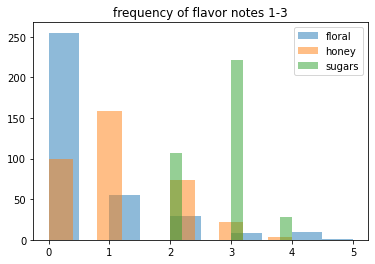

In [15]:
# Plot histographs each flavor note
plt.hist(coffee_data['Floral'], alpha = .5, label = "floral")
plt.hist(coffee_data['Honey'], alpha = .5, label = "honey")
plt.hist(coffee_data['Sugars'], alpha = .5, label = "sugars")
plt.legend(loc='upper right')
plt.title('frequency of flavor notes 1-3')
plt.show()

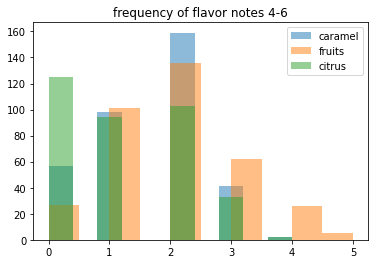

In [16]:
plt.hist(coffee_data['Caramel'], alpha = .5, label = "caramel")
plt.hist(coffee_data['Fruits'], alpha = .5, label = "fruits")
plt.hist(coffee_data['Citrus'], alpha = .5, label = "citrus")
plt.legend(loc='upper right')
plt.title('frequency of flavor notes 4-6')
plt.show()

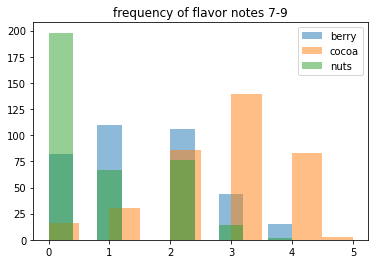

In [17]:
plt.hist(coffee_data['Berry'], alpha = .5, label = "berry")
plt.hist(coffee_data['Cocoa'], alpha = .5, label = "cocoa")
plt.hist(coffee_data['Nuts'], alpha = .5, label = "nuts")
plt.legend(loc='upper right')
plt.title('frequency of flavor notes 7-9')
plt.show()

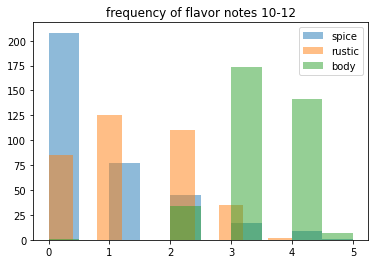

In [18]:
plt.hist(coffee_data['Rustic'], alpha = .5, label = "spice")
plt.hist(coffee_data['Spice'], alpha = .5, label = "rustic")
plt.hist(coffee_data['Body (Flavor)'], alpha = .5, label = "body")
plt.legend(loc='upper right')
plt.title('frequency of flavor notes 10-12')
plt.show()

Based on the histograms above, there does not appear to be a clear relationship between the rarity of a flavor note and its tendency to elevate cupping scores. For example, floral notes are very rare and showed the highest difference in means in the data above. However, spice notes are similarly rare and had an adverse effect on cupping scores. Conversely, sugar notes (which are relatively common) had positive effects on cupping scores while cocoa notes (which is similarly common) had negative effects.

## Conclusions
There are three major takeaways from these analyses:
* Coffees from East Africa scored significantly higher than those from South America and Southeastern Asia.
* Coffees processed with wet or dry methods scored significantly higher than those processed with semi-dry methods.
* The presence of 10 of the 12 flavor notes in this dataset (at a threshold of 3/5) had a significant effect on cupping scores.

One theme I have noticed in these analyses is that processes and flavor notes typical of Southeast Asian coffees tended to yield lower average cupping scores than those of South America and East Africa. Semi-dry processing methods are most prevalent in Indonesia, and Southeast Asian coffees tend to be associated with rustic and spice notes. Brazil is another country where semi-dry processes are used, though not as widespread as in Indonesia; Brazilian coffees are notable for their cocoa notes, in general. 

On the other hand, East African coffees (along with their floral and citrus notes) tended to be among the highest-scoring coffees. These coffees are often wet processed, which is notable for its ability to heighten the flavor notes of single-origin coffees.